# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Import Data

In [3]:
df = pd.read_csv('flight.csv', delimiter=',')
df.head(10)

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,...,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,...,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39
5,56972,2/10/2008,9/29/2009,Male,6,guangzhou,guangdong,CN,64.0,3/31/2014,...,76946.0,294585,1/13/2014,79,7.043956,52,10,0.967692,343121,15
6,44924,3/22/2006,3/29/2006,Male,6,wulumuqishi,xinjiang,CN,46.0,3/31/2014,...,114469.0,287042,3/31/2014,1,7.190000,28,20,0.965347,298873,29
7,22631,4/9/2010,4/9/2010,Female,6,wenzhoushi,zhejiang,CN,50.0,3/31/2014,...,114971.0,287230,3/29/2014,3,10.111111,45,7,0.962070,351198,14
8,32197,6/7/2011,7/1/2011,Male,5,DRANCY,NaN,FR,50.0,3/31/2014,...,87401.0,321489,3/26/2014,6,13.054545,94,5,0.828478,295158,7
9,31645,7/5/2010,7/5/2010,Female,6,wenzhou,zhejiang,CN,43.0,3/31/2014,...,60267.0,375074,3/17/2014,15,11.333333,73,13,0.708010,251907,16


# Exploratory Data Analysis


## Descriptive Analysis

In [4]:
eda = df.copy()

In [5]:
eda['MEMBER_NO'].duplicated().sum()

0

In [6]:
eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

In [7]:
eda['LAST_FLIGHT_DATE_NEW'] = np.where(eda['LAST_FLIGHT_DATE']=='2014/2/29  0:00:00', '2014/2/28',eda['LAST_FLIGHT_DATE'])
eda[['FFP_DATE', 'FIRST_FLIGHT_DATE', 'LOAD_TIME','LAST_FLIGHT_DATE_NEW']] = eda[['FFP_DATE', 'FIRST_FLIGHT_DATE', 'LOAD_TIME', 'LAST_FLIGHT_DATE_NEW']].apply(pd.to_datetime)

#Drop variabel LAST_FLIGHT_DATE
eda = eda.drop('LAST_FLIGHT_DATE', axis=1)

In [8]:
eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   MEMBER_NO             62988 non-null  int64         
 1   FFP_DATE              62988 non-null  datetime64[ns]
 2   FIRST_FLIGHT_DATE     62988 non-null  datetime64[ns]
 3   GENDER                62985 non-null  object        
 4   FFP_TIER              62988 non-null  int64         
 5   WORK_CITY             60719 non-null  object        
 6   WORK_PROVINCE         59740 non-null  object        
 7   WORK_COUNTRY          62962 non-null  object        
 8   AGE                   62568 non-null  float64       
 9   LOAD_TIME             62988 non-null  datetime64[ns]
 10  FLIGHT_COUNT          62988 non-null  int64         
 11  BP_SUM                62988 non-null  int64         
 12  SUM_YR_1              62437 non-null  float64       
 13  SUM_YR_2        

In [9]:
categoric = eda.select_dtypes(include = 'object')
date = eda.select_dtypes(include = 'datetime64[ns]')
numeric = eda.select_dtypes(exclude = ('object','datetime64[ns]'))

In [10]:
categoric.describe()

,GENDER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY
count,62985,60719,59740,62962
unique,2,3234,1165,118
top,Male,guangzhou,guangdong,CN
freq,48134,9386,17509,57748


In [11]:
date.describe()

,FFP_DATE,FIRST_FLIGHT_DATE,LOAD_TIME,LAST_FLIGHT_DATE_NEW
count,62988,62988,62988,62988
unique,3068,3406,1,730
top,2011-01-13 00:00:00,2013-02-16 00:00:00,2014-03-31 00:00:00,2014-03-31 00:00:00
freq,184,96,62988,959
first,2004-11-01 00:00:00,1905-12-31 00:00:00,2014-03-31 00:00:00,2012-04-01 00:00:00
last,2013-03-31 00:00:00,2015-05-30 00:00:00,2014-03-31 00:00:00,2014-03-31 00:00:00


In [12]:
numeric.describe().T

,count,mean,std,min,25%,50%,75%,max
MEMBER_NO,62988.0,31494.500000,18183.213715,1.0,15747.750000,31494.500000,47241.250000,62988.0
FFP_TIER,62988.0,4.102162,0.373856,4.0,4.000000,4.000000,4.000000,6.0
AGE,62568.0,42.476346,9.885915,6.0,35.000000,41.000000,48.000000,110.0
FLIGHT_COUNT,62988.0,11.839414,14.049471,2.0,3.000000,7.000000,15.000000,213.0
BP_SUM,62988.0,10925.081254,16339.486151,0.0,2518.000000,5700.000000,12831.000000,505308.0
SUM_YR_1,62437.0,5355.376064,8109.450147,0.0,1003.000000,2800.000000,6574.000000,239560.0
SUM_YR_2,62850.0,5604.026014,8703.364247,0.0,780.000000,2773.000000,6845.750000,234188.0
SEG_KM_SUM,62988.0,17123.878691,20960.844623,368.0,4747.000000,9994.000000,21271.250000,580717.0
LAST_TO_END,62988.0,176.120102,183.822223,1.0,29.000000,108.000000,268.000000,731.0
AVG_INTERVAL,62988.0,67.749788,77.517866,0.0,23.370370,44.666667,82.000000,728.0


## Univariate Analysis

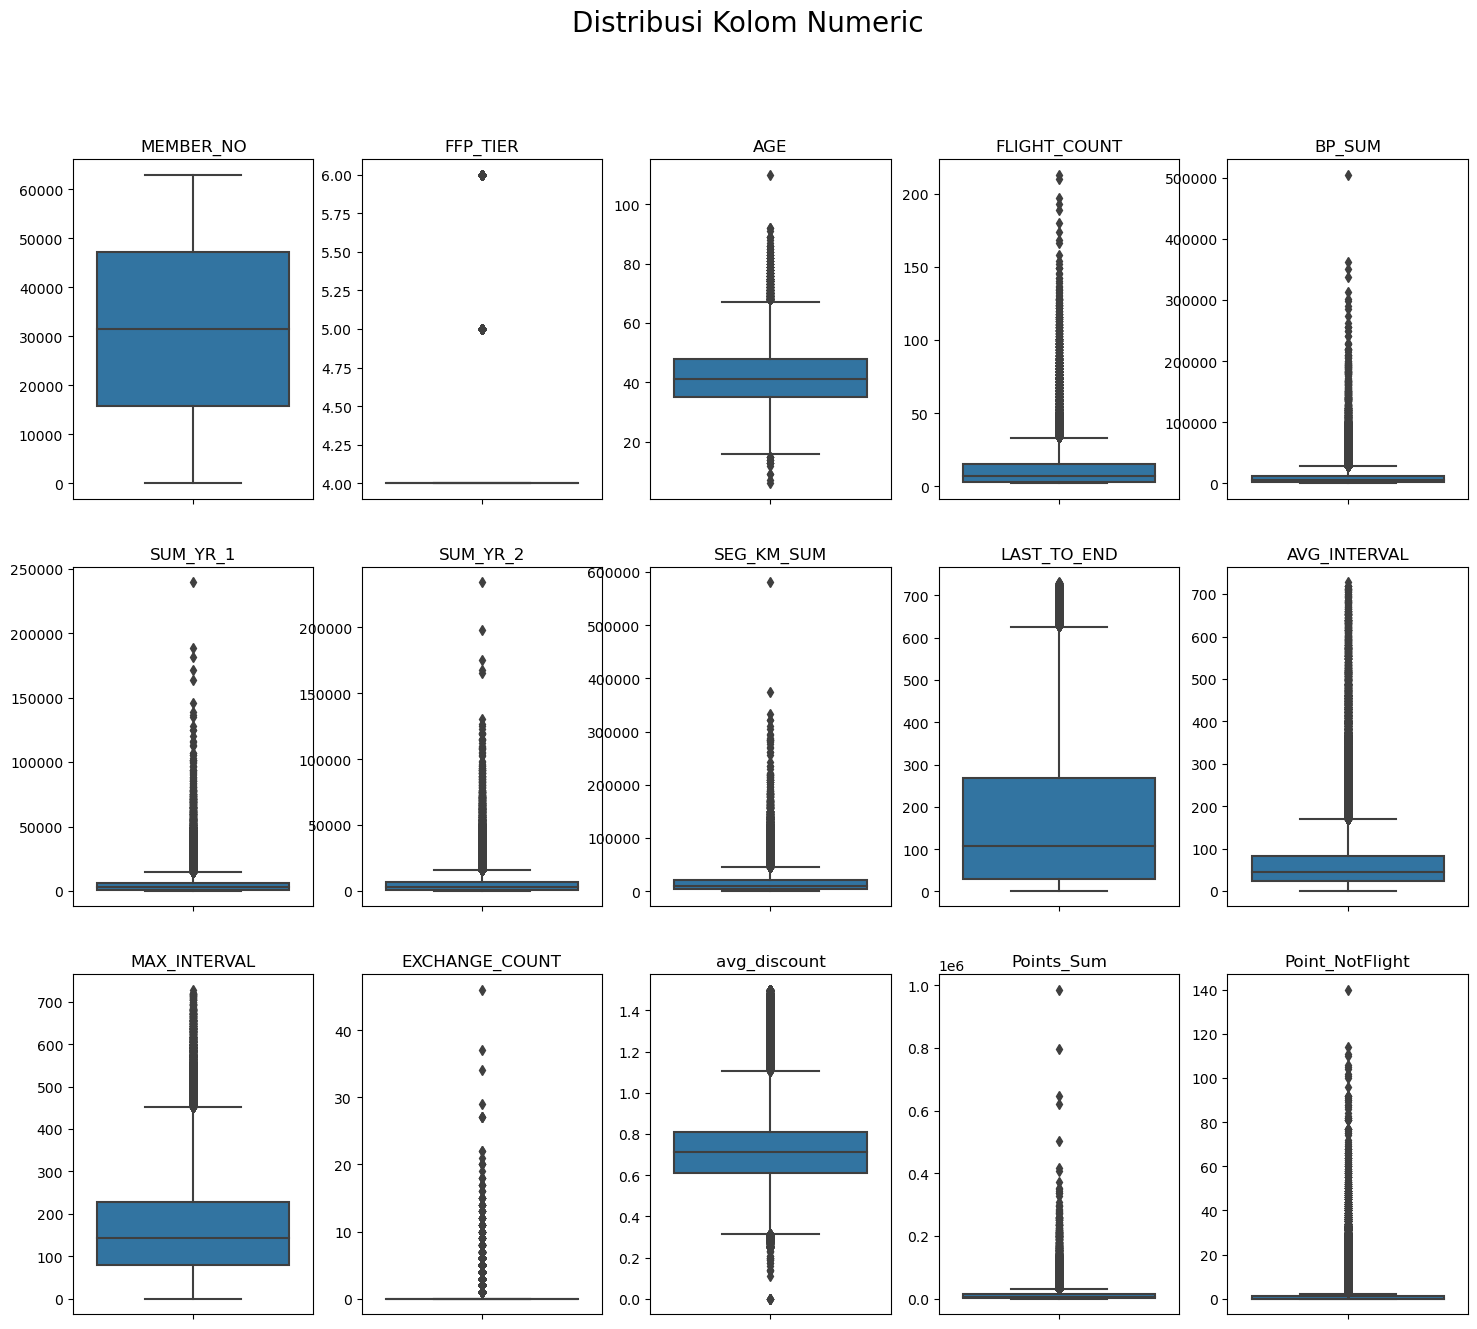

In [13]:
fig, ax = plt.subplots(3,5,figsize=(18, 15))
fig.suptitle('Distribusi Kolom Numeric', fontsize=20)
ax = ax.flatten()
for i,c in enumerate(numeric):
  sns.boxplot(y=c, data=eda, ax=ax[i])
  ax[i].set_title(c) 
  ax[i].set_ylabel('')
plt.show()

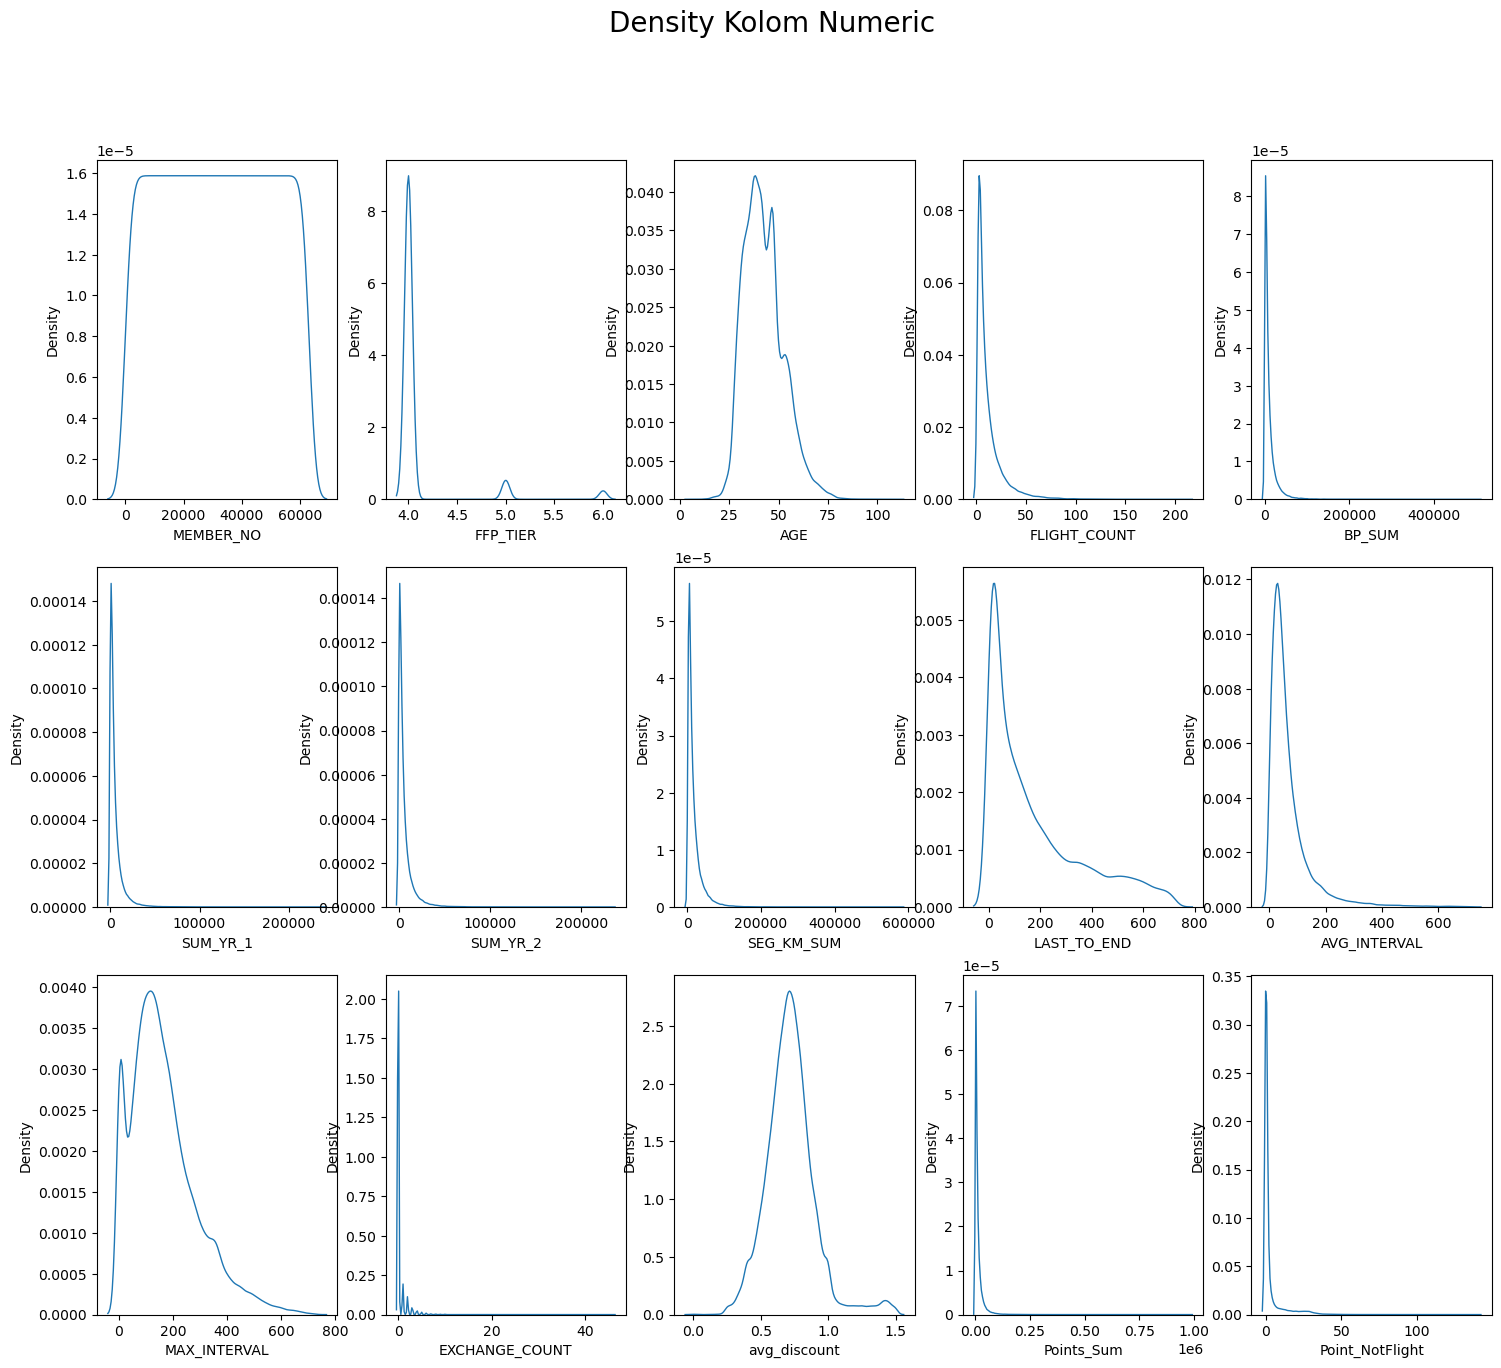

In [14]:
fig, ax = plt.subplots(3,5,figsize=(18, 15))
fig.suptitle('Density Kolom Numeric', fontsize=20)
ax = ax.flatten()

for i,c in enumerate(numeric):
  sns.kdeplot(eda[c], linewidth= 1,ax=ax[i])

plt.show()

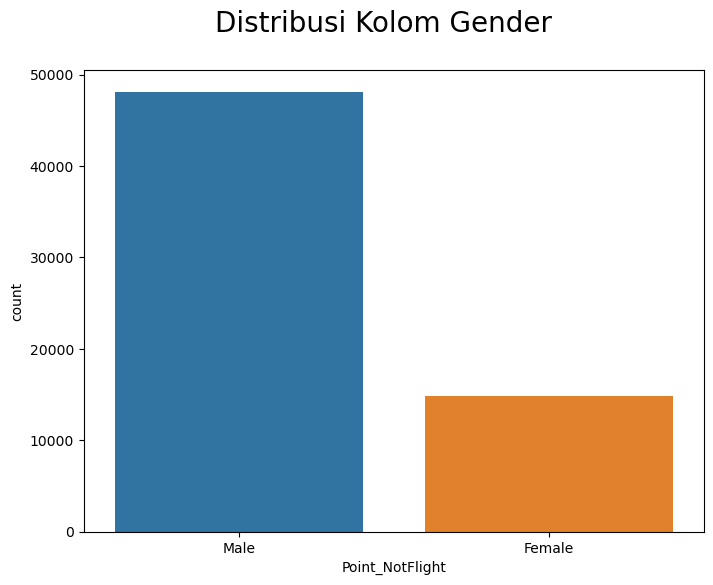

In [15]:
fig, ax = plt.subplots(1,1,figsize=(8, 6))
fig.suptitle('Distribusi Kolom Gender', fontsize=20)
sns.countplot(x= 'GENDER', data=eda)
plt.xlabel(c);
plt.show()

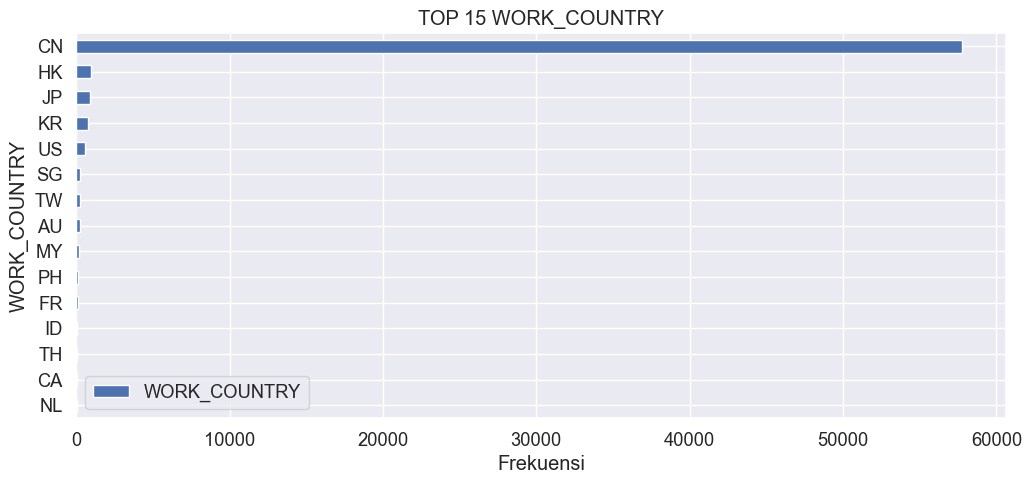

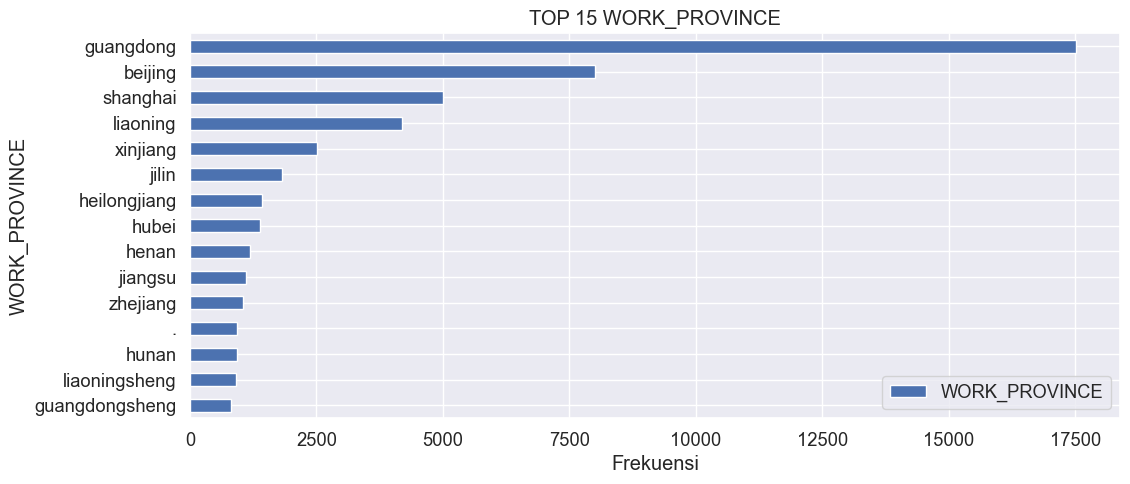

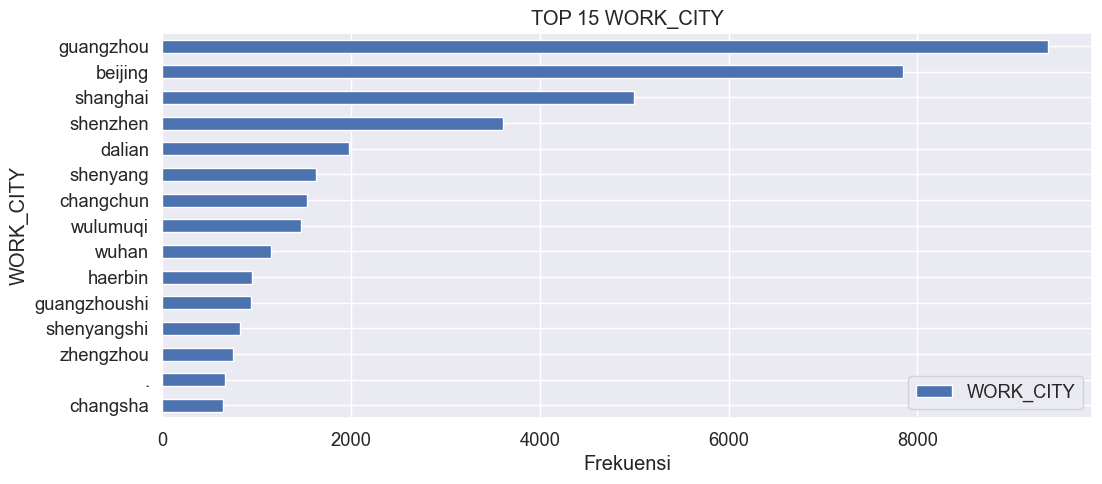

In [16]:
work = ['WORK_COUNTRY', 'WORK_PROVINCE', 'WORK_CITY']

for i in range(0,len(work)):
    plt.rcParams['figure.figsize'] = (12,5)
    sns.set(font_scale=1.2)
    x = pd.DataFrame(eda[work[i]].value_counts(ascending=True)).tail(15)
    x.plot(kind='barh')
    plt.title('TOP 15 ' + work[i])
    plt.ylabel(work[i])
    plt.xlabel('Frekuensi')
    plt.show()
    print()

In [17]:
# your code goes here!
ffp = eda.groupby(['FFP_DATE']).agg({'MEMBER_NO':['nunique']}).reset_index()
ffp.columns = ['FFP_DATE','Frekuensi']

first = eda.groupby(['FIRST_FLIGHT_DATE']).agg({'MEMBER_NO':['nunique']}).reset_index()
first.columns = ['FIRST_FLIGHT_DATE','Frekuensi']

last = eda.groupby(['LAST_FLIGHT_DATE_NEW']).agg({'MEMBER_NO':['nunique']}).reset_index()
last.columns = ['LAST_FLIGHT_DATE_NEW','Frekuensi']

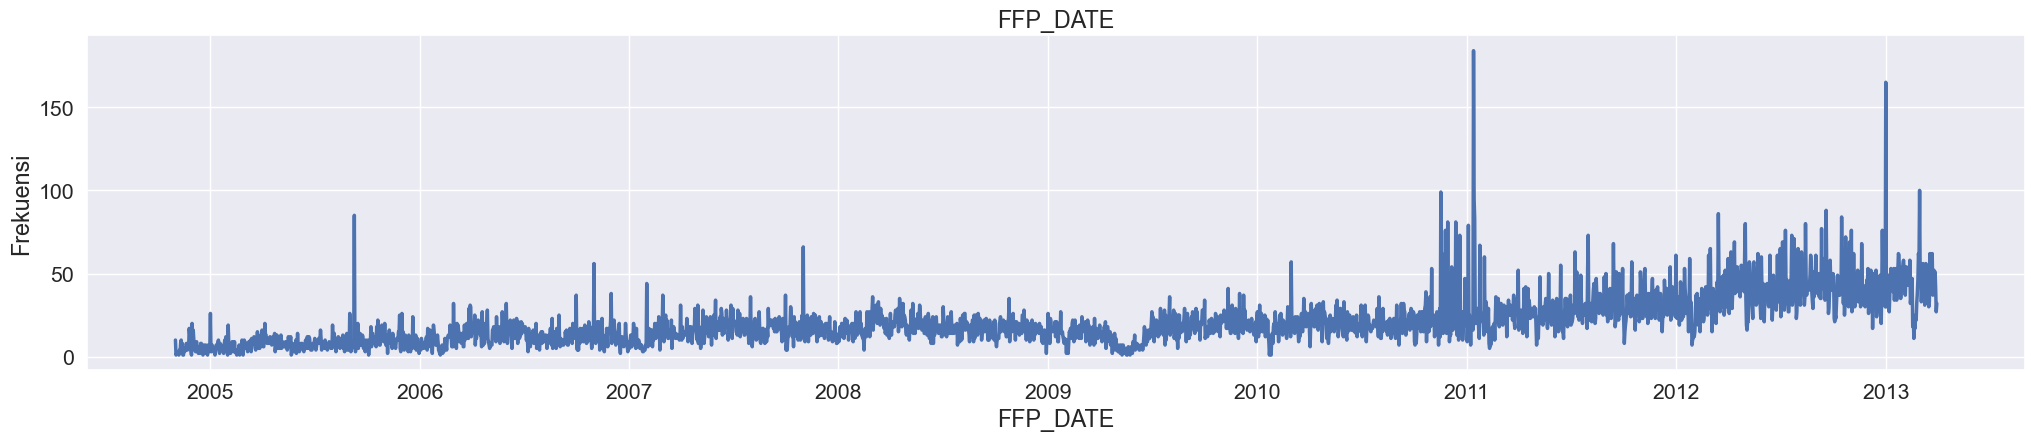

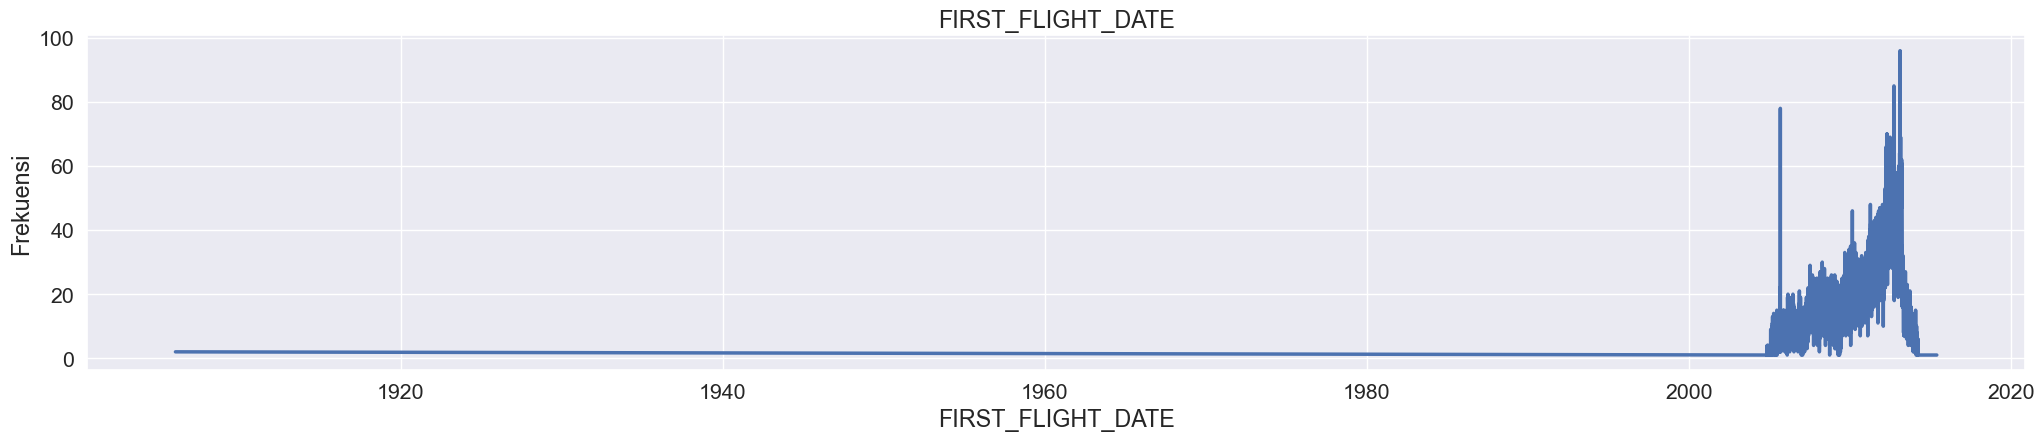

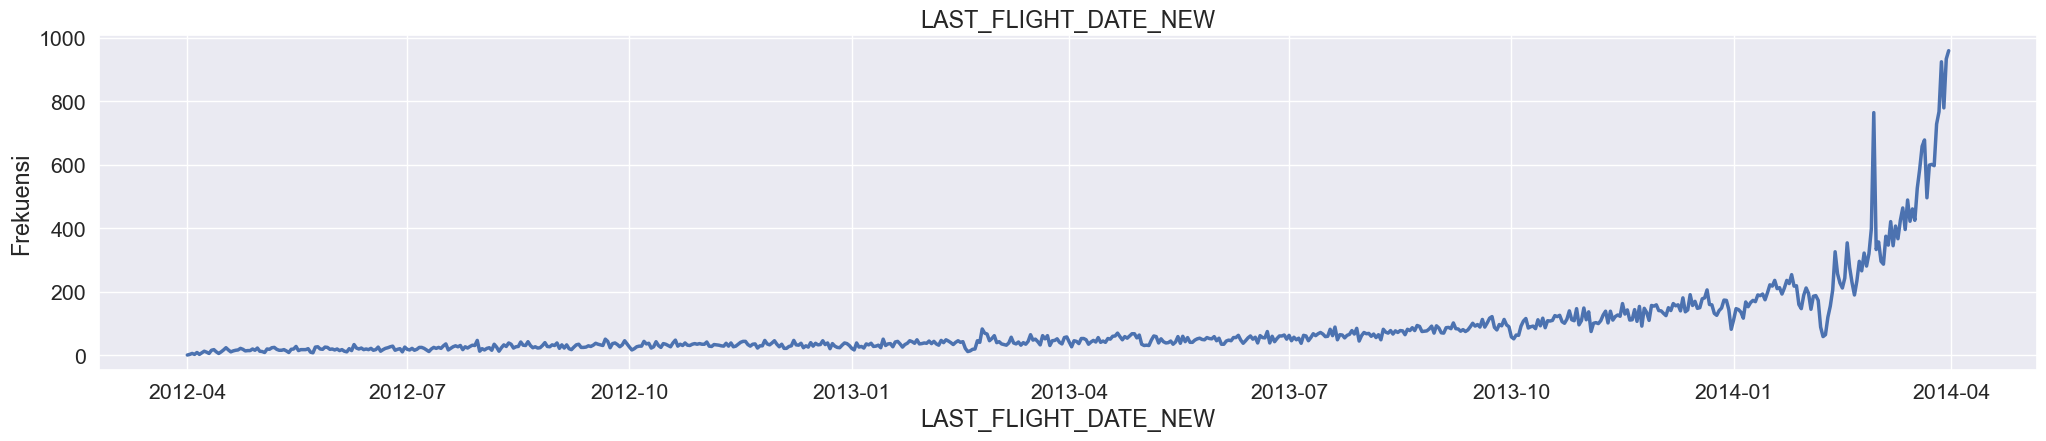

In [18]:
plt.rcParams['figure.figsize'] = (25,20)
sns.set(font_scale=1.4)

plt.subplot(4, 1, 1)
sns.lineplot(ffp['FFP_DATE'],ffp['Frekuensi'],palette="tab10", linewidth=2.5)
plt.title('FFP_DATE')
plt.show()
print()

plt.subplot(4, 1, 2)
sns.lineplot(first['FIRST_FLIGHT_DATE'],first['Frekuensi'],palette="tab10", linewidth=2.5)
plt.title('FIRST_FLIGHT_DATE')
plt.show()
print()

plt.subplot(4, 1, 3)
sns.lineplot(last['LAST_FLIGHT_DATE_NEW'],last['Frekuensi'],palette="tab10", linewidth=2.5)
plt.title('LAST_FLIGHT_DATE_NEW')
plt.show()

# Preprocessing

## Handling Missing Values

In [19]:
dfp = eda.copy()

In [20]:
# Checking null values
dfp.isna().sum()

MEMBER_NO                  0
FFP_DATE                   0
FIRST_FLIGHT_DATE          0
GENDER                     3
FFP_TIER                   0
WORK_CITY               2269
WORK_PROVINCE           3248
WORK_COUNTRY              26
AGE                      420
LOAD_TIME                  0
FLIGHT_COUNT               0
BP_SUM                     0
SUM_YR_1                 551
SUM_YR_2                 138
SEG_KM_SUM                 0
LAST_TO_END                0
AVG_INTERVAL               0
MAX_INTERVAL               0
EXCHANGE_COUNT             0
avg_discount               0
Points_Sum                 0
Point_NotFlight            0
LAST_FLIGHT_DATE_NEW       0
dtype: int64

Sebelum dilakukan pengisian data pada Missing Value, akan dicek terlebih dahulu distribusi pada tiap variabel numerik

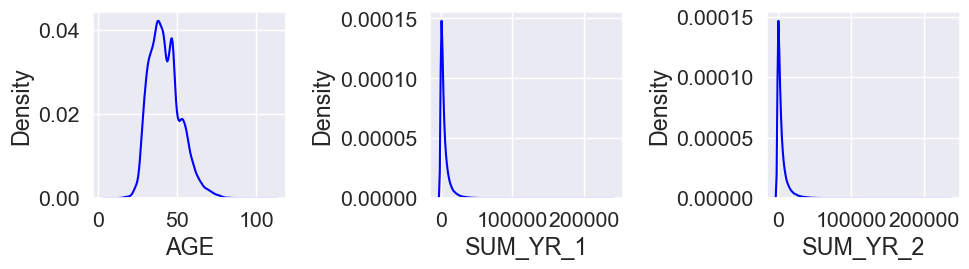

In [21]:
numer = ['AGE', 'SUM_YR_1','SUM_YR_2']
for i in range(0, len(numer)):
  plt.rcParams['figure.figsize'] = (10,3)
  plt.subplot(1,3,i+1)
  sns.kdeplot(x=dfp[numer[i]], color='blue')
  plt.xlabel(numer[i])
  plt.tight_layout()

Pada variabel numerik yang terdapat missing value memiliki distribusi positively skewed sehingga dalam mengisi missing value akan digunakan Median.

Untuk missing value pada variabel kategorik akan diisi dengan Modus

In [22]:
dfp['AGE'] = dfp['AGE'].fillna(dfp['AGE'].median())
dfp['SUM_YR_1'] = dfp['SUM_YR_1'].fillna(dfp['SUM_YR_1'].median())
dfp['SUM_YR_2'] = dfp['SUM_YR_1'].fillna(dfp['SUM_YR_2'].median())
dfp['GENDER'] = dfp['GENDER'].fillna(dfp['GENDER'].mode()[0])
dfp['WORK_CITY'] = dfp['WORK_CITY'].fillna(dfp['WORK_CITY'].mode()[0])
dfp['WORK_PROVINCE'] = dfp['WORK_PROVINCE'].fillna(dfp['WORK_PROVINCE'].mode()[0])
dfp['WORK_COUNTRY'] = dfp['WORK_COUNTRY'].fillna(dfp['WORK_COUNTRY'].mode()[0])

In [23]:
dfp.isna().sum()

MEMBER_NO               0
FFP_DATE                0
FIRST_FLIGHT_DATE       0
GENDER                  0
FFP_TIER                0
WORK_CITY               0
WORK_PROVINCE           0
WORK_COUNTRY            0
AGE                     0
LOAD_TIME               0
FLIGHT_COUNT            0
BP_SUM                  0
SUM_YR_1                0
SUM_YR_2                0
SEG_KM_SUM              0
LAST_TO_END             0
AVG_INTERVAL            0
MAX_INTERVAL            0
EXCHANGE_COUNT          0
avg_discount            0
Points_Sum              0
Point_NotFlight         0
LAST_FLIGHT_DATE_NEW    0
dtype: int64

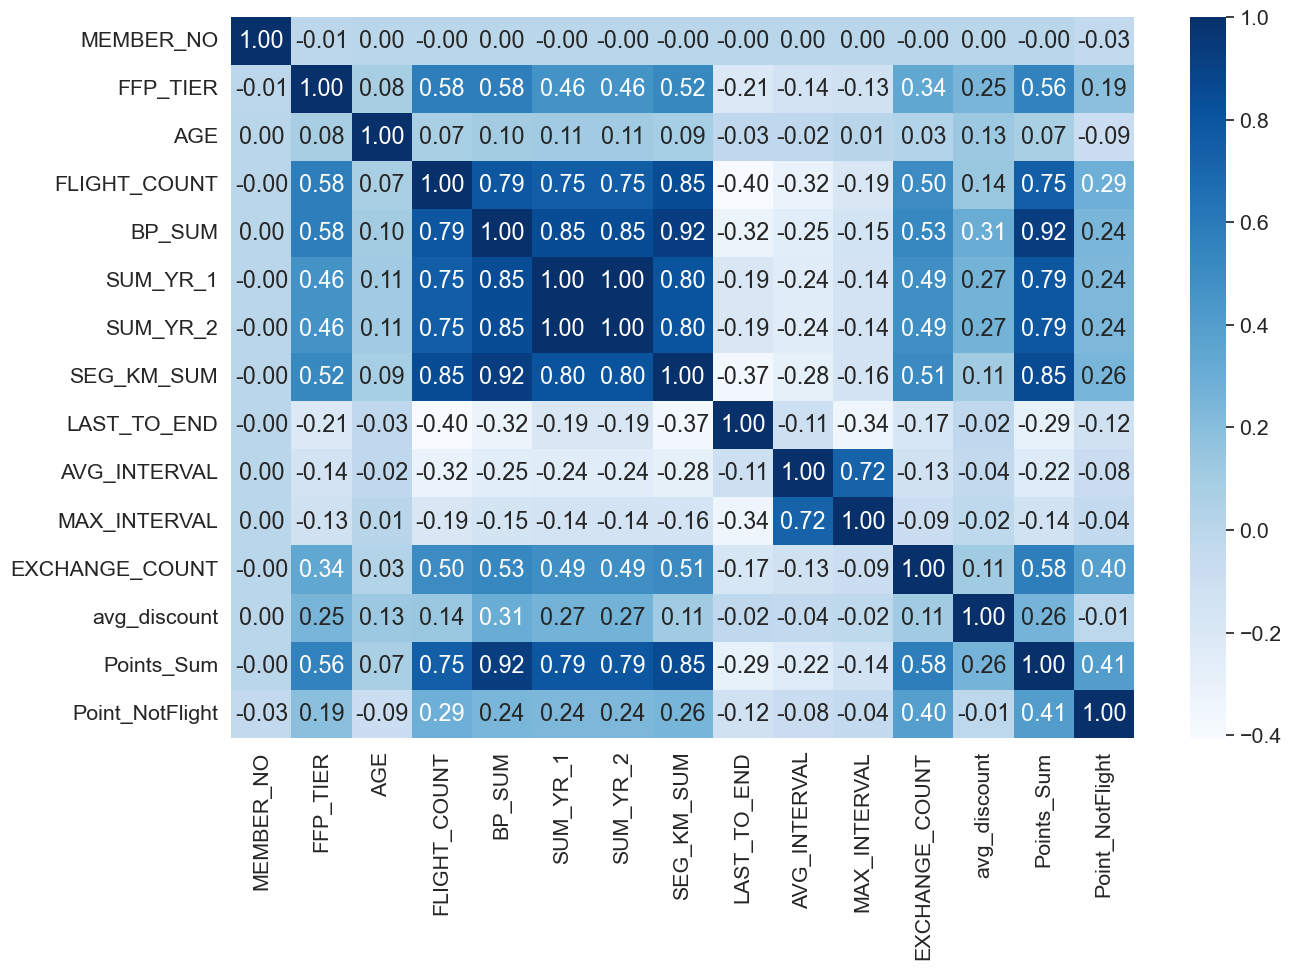

In [24]:
plt.figure(figsize = (14,10))
sns.heatmap(dfp.corr(), cmap='Blues', annot=True, fmt='.2f')
plt.tight_layout()

## Features Engineering

In [25]:
pd.set_option('display.max_columns', None)
dfp.head(10)

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight,LAST_FLIGHT_DATE_NEW
0,54993,2006-11-02,2008-12-24,Male,6,.,beijing,CN,31.0,2014-03-31,210,505308,239560.0,239560.0,580717,1,3.483254,18,34,0.961639,619760,50,2014-03-31
1,28065,2007-02-19,2007-08-03,Male,6,guangzhou,beijing,CN,42.0,2014-03-31,140,362480,171483.0,171483.0,293678,7,5.194245,17,29,1.252314,415768,33,2014-03-25
2,55106,2007-02-01,2007-08-30,Male,6,.,beijing,CN,40.0,2014-03-31,135,351159,163618.0,163618.0,283712,11,5.298507,18,20,1.254676,406361,26,2014-03-21
3,21189,2008-08-22,2008-08-23,Male,5,Los Angeles,CA,US,64.0,2014-03-31,23,337314,116350.0,116350.0,281336,97,27.863636,73,11,1.090870,372204,12,2013-12-26
4,39546,2009-04-10,2009-04-15,Male,6,guiyang,guizhou,CN,48.0,2014-03-31,152,273844,124560.0,124560.0,309928,5,4.788079,47,27,0.970658,338813,39,2014-03-27
5,56972,2008-02-10,2009-09-29,Male,6,guangzhou,guangdong,CN,64.0,2014-03-31,92,313338,112364.0,112364.0,294585,79,7.043956,52,10,0.967692,343121,15,2014-01-13
6,44924,2006-03-22,2006-03-29,Male,6,wulumuqishi,xinjiang,CN,46.0,2014-03-31,101,248864,120500.0,120500.0,287042,1,7.190000,28,20,0.965347,298873,29,2014-03-31
7,22631,2010-04-09,2010-04-09,Female,6,wenzhoushi,zhejiang,CN,50.0,2014-03-31,73,301864,82440.0,82440.0,287230,3,10.111111,45,7,0.962070,351198,14,2014-03-29
8,32197,2011-06-07,2011-07-01,Male,5,DRANCY,guangdong,FR,50.0,2014-03-31,56,262958,72596.0,72596.0,321489,6,13.054545,94,5,0.828478,295158,7,2014-03-26
9,31645,2010-07-05,2010-07-05,Female,6,wenzhou,zhejiang,CN,43.0,2014-03-31,64,204855,85258.0,85258.0,375074,15,11.333333,73,13,0.708010,251907,16,2014-03-17


In [26]:
LRFM = dfp[['LAST_TO_END','FLIGHT_COUNT','SEG_KM_SUM']].reset_index()

# Membuat indikator L dengan berdasarkan kolom LOAD_TIME dikurangi FPP_DATE
LRFM['L'] = (dfp['LOAD_TIME'] - dfp['FFP_DATE']).dt.days

# Mengubah nama kolom agar sesuai dengan RFM
LRFM.rename(columns={'LAST_TO_END':'R','FLIGHT_COUNT':'F','SEG_KM_SUM':'M'}, inplace = True)

# Membuat ulang judul menjadi LRFM
ColumnsTitles = ['L', 'R', 'F', 'M']
LRFM = LRFM.reindex(columns=ColumnsTitles)
LRFM

,L,R,F,M
0,2706,1,210,580717
1,2597,7,140,293678
2,2615,11,135,283712
3,2047,97,23,281336
4,1816,5,152,309928
...,...,...,...,...
62983,1046,297,2,1134
62984,1484,89,4,8016
62985,2923,29,2,2594
62986,418,400,2,3934


In [27]:
LRFM.describe()

,L,R,F,M
count,62988.000000,62988.000000,62988.000000,62988.000000
mean,1485.000826,176.120102,11.839414,17123.878691
std,847.222941,183.822223,14.049471,20960.844623
min,365.000000,1.000000,2.000000,368.000000
25%,732.000000,29.000000,3.000000,4747.000000
50%,1270.000000,108.000000,7.000000,9994.000000
75%,2179.000000,268.000000,15.000000,21271.250000
max,3437.000000,731.000000,213.000000,580717.000000


In [28]:
for i in LRFM:
    LRFM[i] = np.log(LRFM[i])

In [29]:
LRFM.describe()

,L,R,F,M
count,62988.000000,62988.000000,62988.000000,62988.000000
mean,7.122734,4.367487,1.991248,9.230562
std,0.622567,1.542762,0.952441,1.019778
min,5.899897,0.000000,0.693147,5.908083
25%,6.595781,3.367296,1.098612,8.465268
50%,7.146772,4.682131,1.945910,9.209740
75%,7.686621,5.590987,2.708050,9.965112
max,8.142354,6.594413,5.361292,13.272019


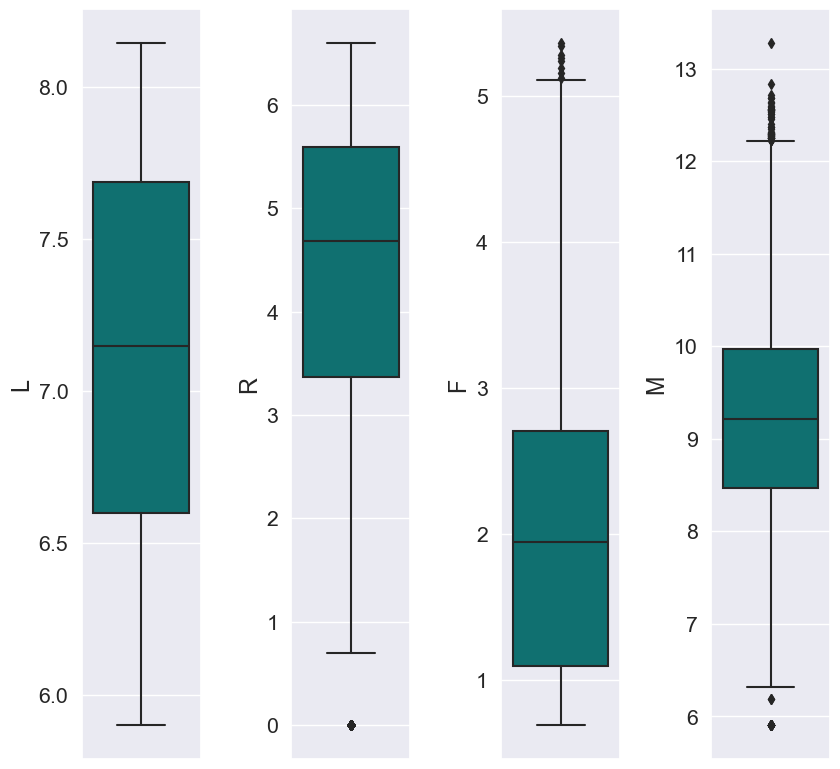

In [30]:
plt.figure(figsize=(15,8))

feat_num = list(LRFM)
for i in range(0, len(feat_num)):
  plt.subplot(1, 7, i+1)
  sns.boxplot(y=LRFM[feat_num[i]],color='teal', orient='v')
  plt.tight_layout()

In [31]:
from scipy import stats

lrfm = LRFM.copy()
print(f'Jumlah baris sebelum memfilter outlier: {len(lrfm)}')

filtered_entries = np.array([True] * len(lrfm))

for col in lrfm:
    zscore = abs(stats.zscore(lrfm[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
lrfm = lrfm[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(lrfm)}')

Jumlah baris sebelum memfilter outlier: 62988
Jumlah baris setelah memfilter outlier: 62909


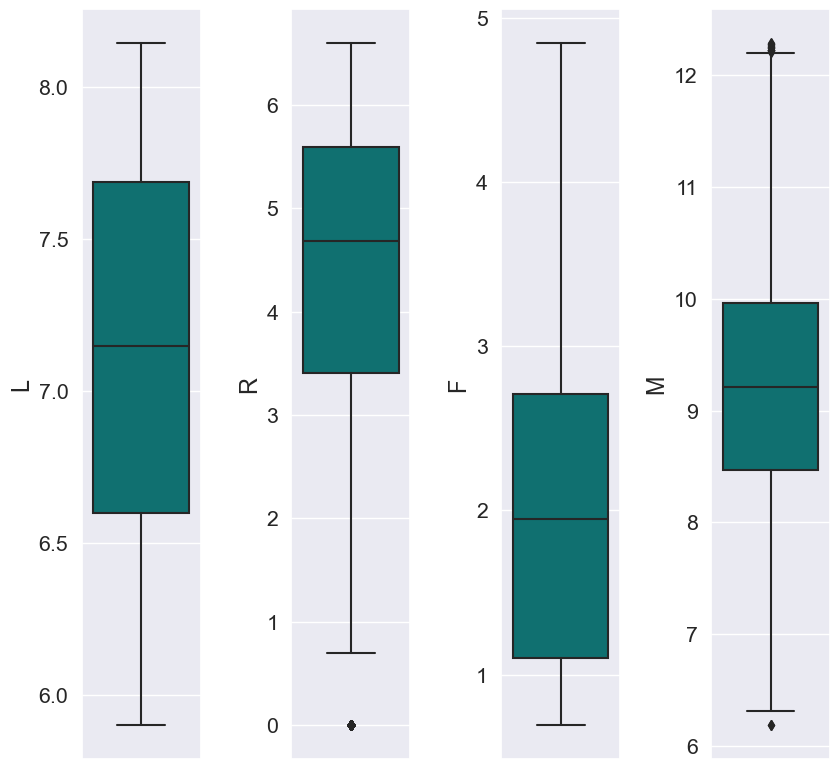

In [32]:
plt.figure(figsize=(15,8))

feat_num = list(lrfm)
for i in range(0, len(feat_num)):
  plt.subplot(1, 7, i+1)
  sns.boxplot(y=lrfm[feat_num[i]],color='teal', orient='v')
  plt.tight_layout()

In [33]:
lrfm.duplicated().sum()

103

In [34]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_std = sc.fit_transform(lrfm.astype(float))

In [35]:
df_std = pd.DataFrame(data=df_std, columns=lrfm.columns)
df_std.head()

,L,R,F,M
0,1.259228,-2.122596,2.929734,2.828261
1,0.143365,-1.572734,2.765869,2.787433
2,1.374552,-2.385726,2.285287,2.770850
3,0.824086,-1.935902,2.816766,2.757695
4,-0.300310,-1.672771,1.207292,3.004202


In [36]:
df_std.describe()

,L,R,F,M
count,6.290900e+04,6.290900e+04,6.290900e+04,6.290900e+04
mean,2.043623e-15,8.411498e-16,1.361505e-13,-1.485044e-15
std,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00
min,-1.963727e+00,-2.835551e+00,-1.365376e+00,-2.999569e+00
25%,-8.458378e-01,-6.283112e-01,-9.382756e-01,-7.526727e-01
50%,3.802738e-02,2.029631e-01,-4.576702e-02,-1.987076e-02
75%,9.057863e-01,7.927738e-01,7.570398e-01,7.230494e-01
max,1.638628e+00,1.443957e+00,3.007158e+00,3.013211e+00


# Modeling

In [37]:
inertia = []
silhouette = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_std.values)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(df_std, kmeans.labels_))

## Elbow Method

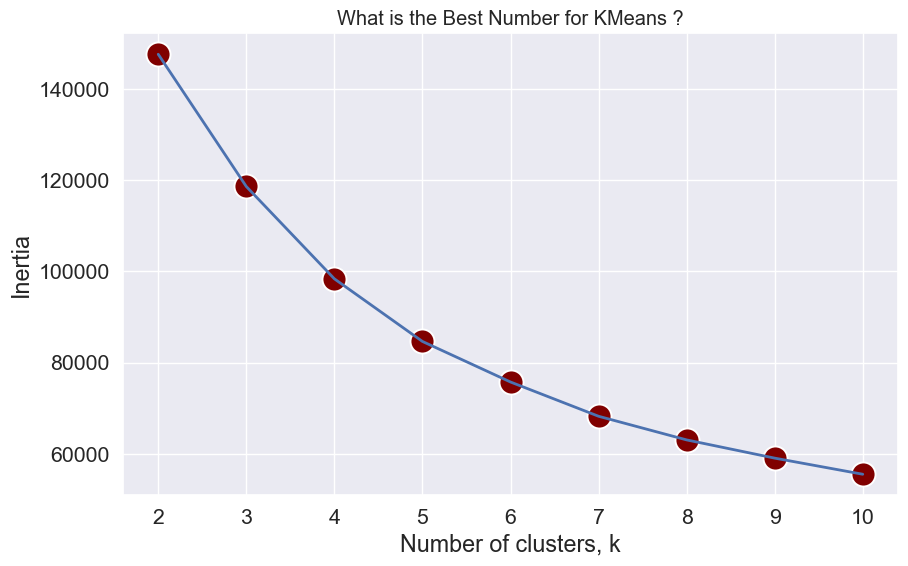

In [38]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(x=range(2,11), y=inertia, linewidth=2)
sns.scatterplot(x=range(2,11), y=inertia, s=300, color='#800000')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(range(2,11))
plt.style.use('ggplot')
plt.title('What is the Best Number for KMeans ?')
plt.show()

In [39]:
inertia

[147613.3431559614,
 118624.34548327875,
 98386.28525706459,
 84659.63522448642,
 75767.59635777943,
 68257.97849250527,
 63075.135949082774,
 59078.83793120229,
 55546.16811277541]

In [40]:
(pd.Series(inertia)-pd.Series(inertia).shift(-1)) / pd.Series(inertia) * 100

0    19.638467
1    17.060630
2    13.951792
3    10.503280
4     9.911385
5     7.593021
6     6.335774
7     5.979586
8          NaN
dtype: float64

## Silhoutte

[0.3484489838175218, 0.2878397049105127, 0.2762801353190638, 0.26145918627756437, 0.2701074338634501, 0.26678190280219105, 0.24891454853372103, 0.251944247443654, 0.24053811849896609]


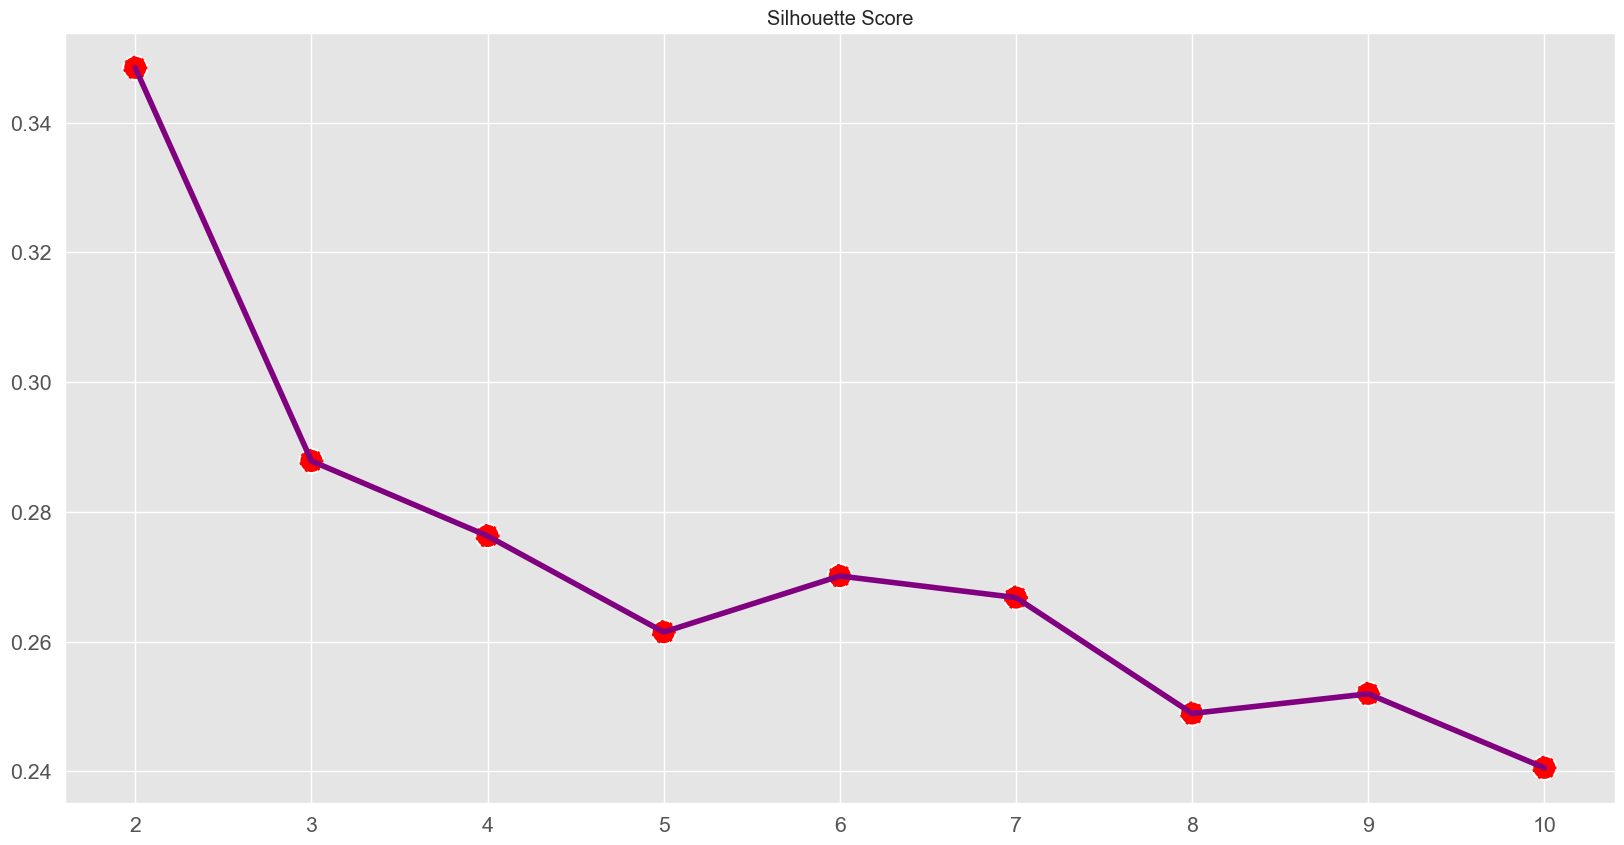

In [41]:
print(silhouette)

plt.figure(figsize=(20, 10))

sns.lineplot(x=range(2, 11), y=silhouette, color='purple', linewidth = 4)
sns.scatterplot(x=range(2, 11), y=silhouette, s=300, color='red',  linestyle='--')
plt.title('Silhouette Score');

## K-Means

In [42]:
kmeans = KMeans(n_clusters= 4, random_state=42)
kmeans.fit(df_std)

KMeans(n_clusters=4, random_state=42)

In [43]:
df_std['clusters'] = kmeans.labels_
df_std.sample(5)

,L,R,F,M,clusters
35724,-0.012117,0.606080,-0.635243,-0.375932,3
20402,-1.284740,0.593035,0.218957,0.613204,2
14593,-1.613204,-0.924729,0.430335,0.933470,2
29605,-0.433849,-0.116634,0.218957,-0.052083,2
26471,-0.269356,0.184681,0.521990,0.359318,2


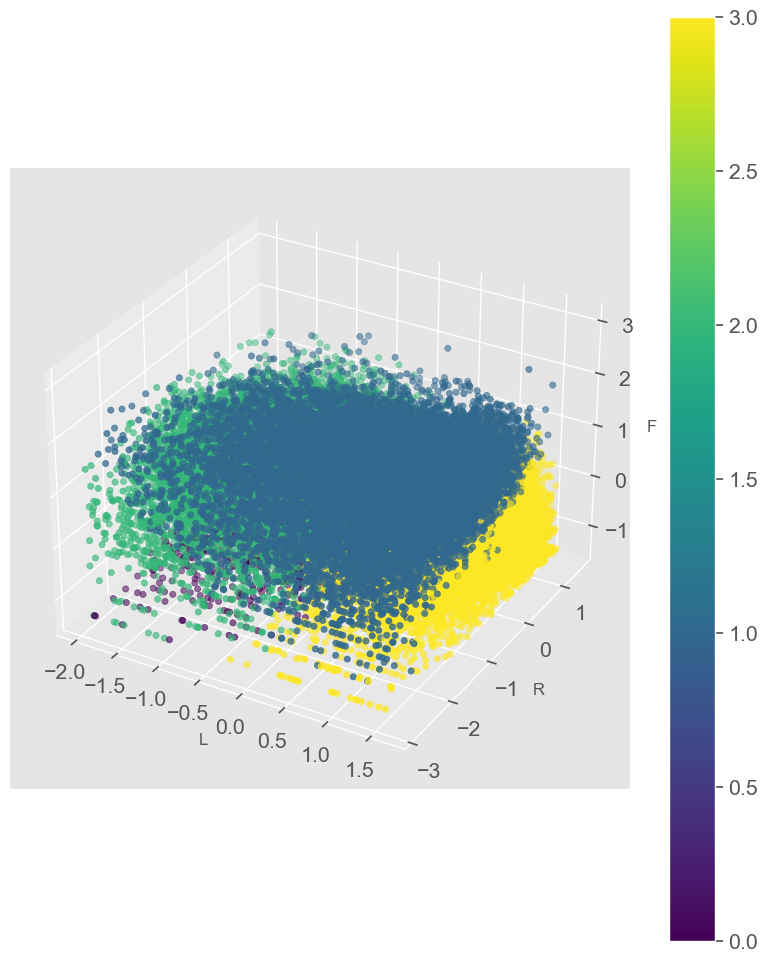

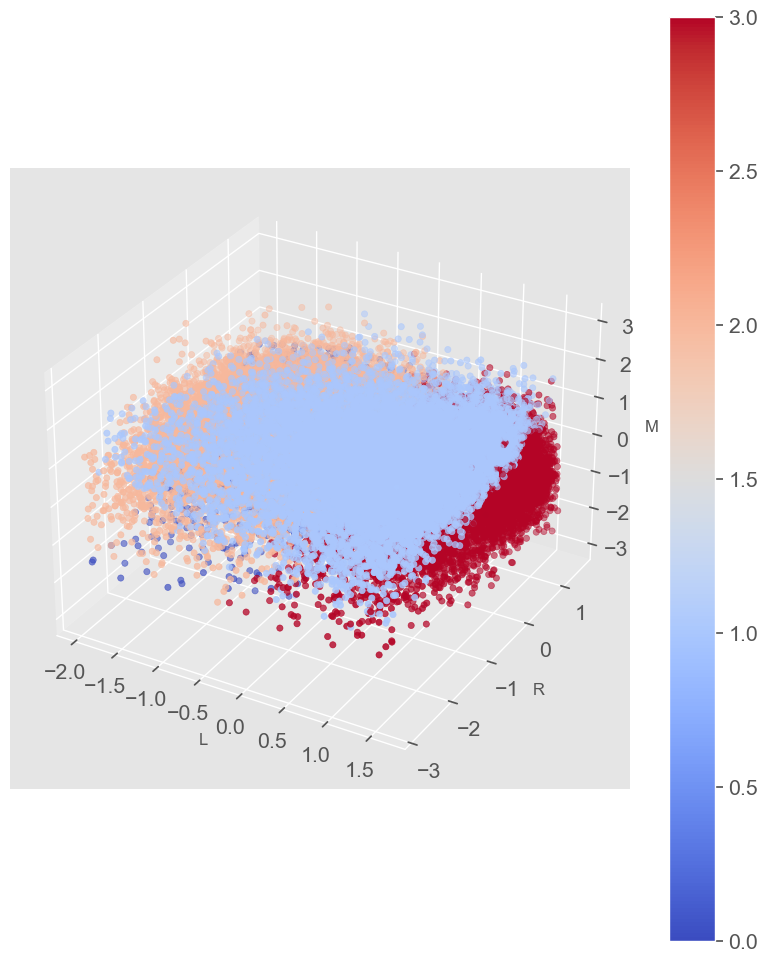

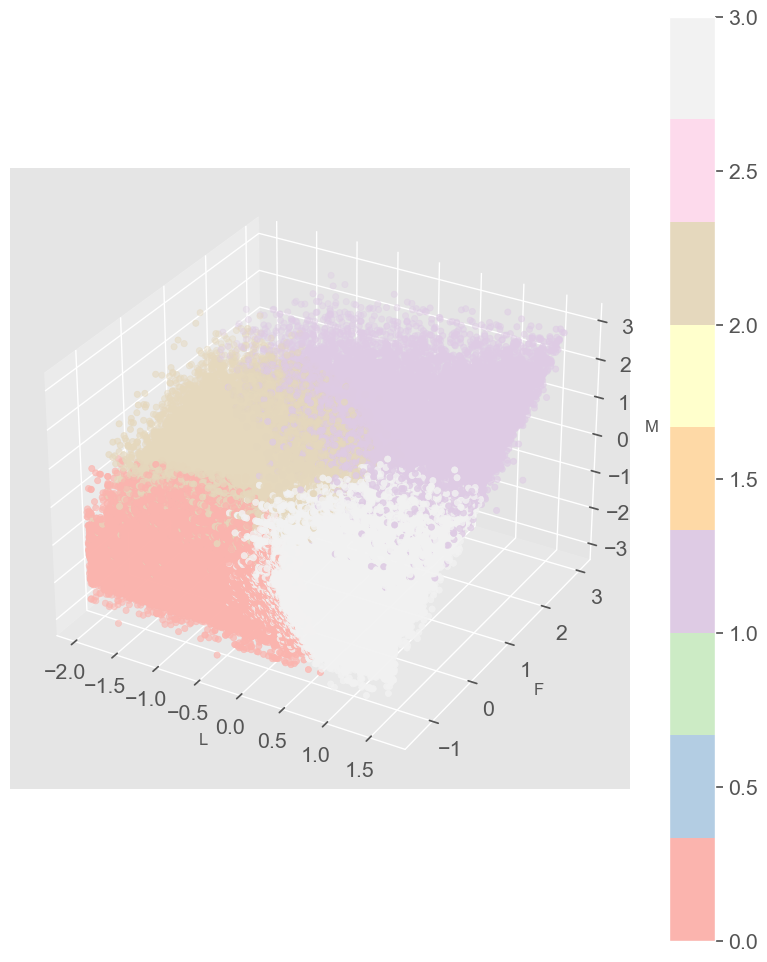

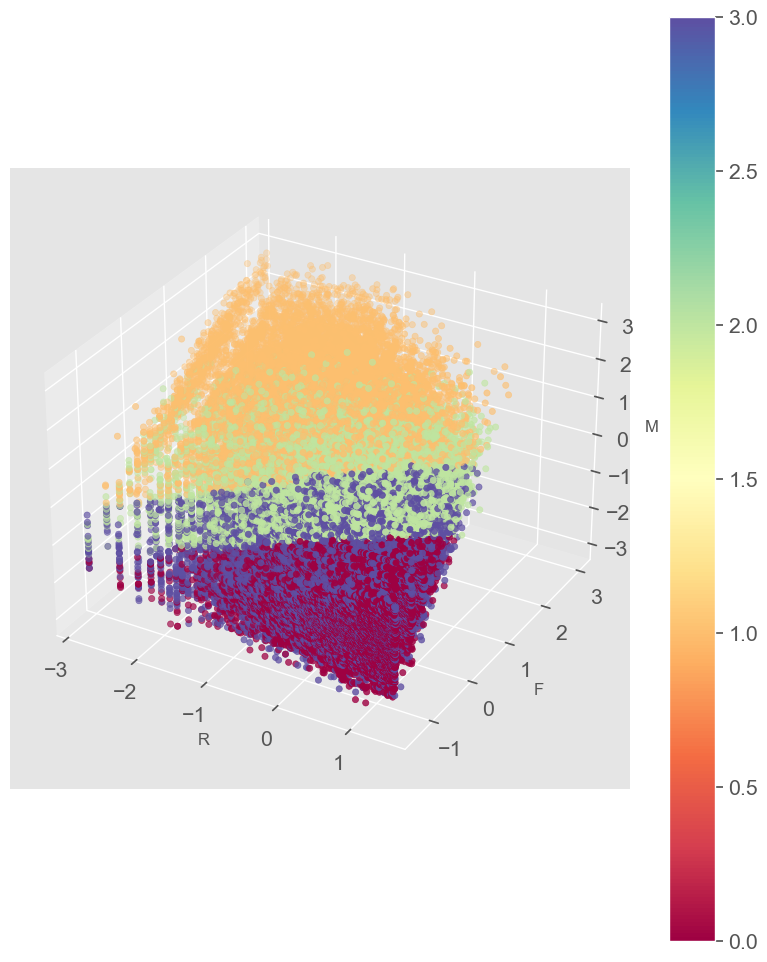

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# create a 3D scatter plot for L, R, and F with cluster as color
fig = plt.figure(figsize=(10,12))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df_std['L'], df_std['R'], df_std['F'], c=df_std['clusters'], cmap='viridis')
ax.set_xlabel('L')
ax.set_ylabel('R')
ax.set_zlabel('F')
plt.colorbar(scatter)
plt.show()

# create a 3D scatter plot for L, R, and M with cluster as color
fig = plt.figure(figsize=(10,12))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df_std['L'], df_std['R'], df_std['M'], c=df_std['clusters'], cmap='coolwarm')
ax.set_xlabel('L')
ax.set_ylabel('R')
ax.set_zlabel('M')
plt.colorbar(scatter)
plt.show()

# create a 3D scatter plot for L, F, and M with cluster as color
fig = plt.figure(figsize=(10,12))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df_std['L'], df_std['F'], df_std['M'], c=df_std['clusters'], cmap='Pastel1')
ax.set_xlabel('L')
ax.set_ylabel('F')
ax.set_zlabel('M')
plt.colorbar(scatter)
plt.show()

# create a 3D scatter plot for R, F, and M with cluster as color
fig = plt.figure(figsize=(10,12))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df_std['R'], df_std['F'], df_std['M'], c=df_std['clusters'], cmap='Spectral')
ax.set_xlabel('R')
ax.set_ylabel('F')
ax.set_zlabel('M')
plt.colorbar(scatter)
plt.show()


## PCA

In [45]:
X = df_std.drop('clusters', axis = 1)
y = df_std['clusters']

In [46]:
pca = PCA(n_components=2)

pca.fit(X)
pcs = pca.transform(X)

data_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
data_pca.head()

,PC 1,PC 2
0,4.747553,-0.329398
1,4.133231,0.655563
2,4.472706,-0.466240
3,4.459162,0.048785
4,3.274680,0.984055


In [47]:
print('Explained variance:', pca.explained_variance_)
print('Explained variance ratio:', pca.explained_variance_ratio_)

Explained variance: [2.39656635 0.94394264]
Explained variance ratio: [0.59913206 0.23598191]


In [48]:
pca.explained_variance_ratio_.sum() * 100

83.51139723186803

In [49]:
data_pca['Cluster'] = y

<AxesSubplot:xlabel='PC 1', ylabel='PC 2'>

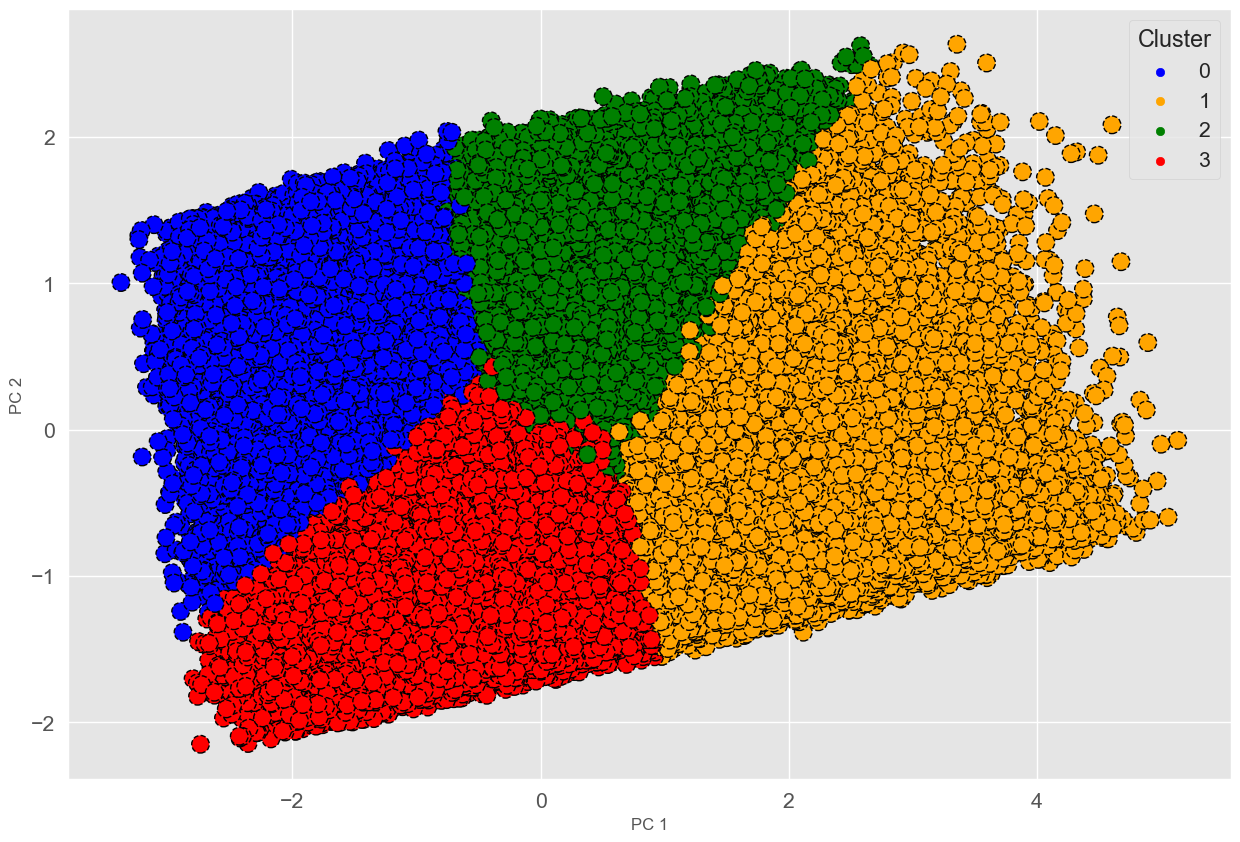

In [50]:
fig, ax = plt.subplots(figsize=(15,10))

sns.scatterplot(
    x="PC 1", y="PC 2",
    hue="Cluster",
    edgecolor='black',
    linestyle='--',
    data=data_pca,
    palette= ['blue', 'orange', 'green', 'red'],
    s=160,
    ax=ax
)

# Interpretation

## Descriptive Statistics

In [51]:
df_final = df.copy()

In [52]:
df_final['Cluster'] = y

In [53]:
pd.set_option('display.max_columns', None)
df_final.sample(5)

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight,Cluster
59987,3485,11/3/2008,6/15/2012,Male,4,shanghai,shanghai,CN,40.0,3/31/2014,3,692,400.0,0.0,3787,7/1/2012,640,8.000000,9,0,0.332585,692,0,0.0
7003,27881,6/18/2006,6/18/2006,Male,4,beijing,beijing,CN,45.0,3/31/2014,17,28394,3500.0,20429.0,34840,3/23/2014,9,38.687500,210,0,0.798414,28394,0,1.0
42288,8458,1/16/2006,1/16/2006,Male,4,shanghai,shanghai,CN,42.0,3/31/2014,4,3425,1440.0,0.0,4992,10/24/2012,525,63.000000,107,0,0.832632,3425,0,3.0
8578,42201,12/23/2011,12/23/2011,Male,4,guangzhou,guangdong,CN,33.0,3/31/2014,23,21717,13313.0,10337.0,35082,11/10/2013,143,25.909091,146,0,0.696093,28576,12,1.0
51524,23894,9/2/2012,9/2/2012,Male,4,huhehaote,neimenggu,CN,47.0,3/31/2014,3,1274,1740.0,0.0,4111,10/19/2012,530,23.500000,42,0,0.613403,1274,0,3.0


## Cluster 0

In [54]:
df_final[df_final['Cluster'] == 0].describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
MEMBER_NO,14886.0,31362.059317,18159.178866,6.000000,15717.250000,31444.000000,47009.750000,62979.0
FFP_TIER,14886.0,4.012159,0.139291,4.000000,4.000000,4.000000,4.000000,6.0
AGE,14764.0,41.462070,10.211188,6.000000,34.000000,40.000000,48.000000,92.0
FLIGHT_COUNT,14886.0,3.788056,2.616019,2.000000,2.000000,3.000000,5.000000,68.0
BP_SUM,14886.0,2487.673116,1977.567567,0.000000,1220.000000,2030.500000,3227.500000,30413.0
SUM_YR_1,14577.0,1501.169671,1676.834829,0.000000,0.000000,1182.000000,2215.000000,36602.0
SUM_YR_2,14807.0,1299.893429,1559.771774,0.000000,0.000000,908.000000,1989.500000,22586.0
SEG_KM_SUM,14886.0,4794.663980,3291.816829,486.000000,2631.000000,4008.000000,5967.000000,39525.0
LAST_TO_END,14886.0,268.675467,204.499830,1.000000,90.000000,222.000000,426.000000,730.0
AVG_INTERVAL,14886.0,94.865872,106.305381,0.000000,18.500000,64.800000,128.000000,720.0


In [55]:
df_final[df_final['Cluster'] == 0].describe(include=[object]).T

,count,unique,top,freq
FFP_DATE,14886,2809,1/13/2011,73
FIRST_FLIGHT_DATE,14886,3007,2/16/2013,35
GENDER,14886,2,Male,10803
WORK_CITY,14315,1236,beijing,1989
WORK_PROVINCE,14057,450,guangdong,3768
WORK_COUNTRY,14877,73,CN,13670
LOAD_TIME,14886,1,3/31/2014,14886
LAST_FLIGHT_DATE,14886,730,2/17/2014,78


## Cluster 1

In [56]:
df_final[df_final['Cluster'] == 1].describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
MEMBER_NO,15119.0,31478.184338,18242.523686,3.000000,15505.000000,31417.000000,47334.000000,62988.0
FFP_TIER,15119.0,4.317349,0.604661,4.000000,4.000000,4.000000,4.000000,6.0
AGE,15047.0,43.917193,9.516382,12.000000,37.000000,43.000000,50.000000,89.0
FLIGHT_COUNT,15119.0,26.059065,19.841308,2.000000,13.000000,21.000000,33.000000,213.0
BP_SUM,15119.0,27132.119585,25241.852177,0.000000,12723.000000,19878.000000,32775.500000,505308.0
SUM_YR_1,15115.0,12555.927092,12589.161217,0.000000,4885.000000,9300.000000,16109.500000,239560.0
SUM_YR_2,15117.0,13705.575246,13292.029656,0.000000,5547.000000,10181.000000,17604.000000,234188.0
SEG_KM_SUM,15119.0,39602.649117,29627.668450,2272.000000,20671.000000,31400.000000,49234.000000,580717.0
LAST_TO_END,15119.0,75.814604,106.396548,1.000000,11.000000,32.000000,97.000000,711.0
AVG_INTERVAL,15119.0,35.167604,29.375225,0.000000,18.448684,28.105263,42.500000,656.0


In [57]:
df_final[df_final['Cluster'] == 1].describe(include=[object]).T

,count,unique,top,freq
FFP_DATE,15119,2968,9/9/2005,34
FIRST_FLIGHT_DATE,15119,3072,9/9/2005,29
GENDER,15118,2,Male,12267
WORK_CITY,14645,1269,guangzhou,2966
WORK_PROVINCE,14441,470,guangdong,4962
WORK_COUNTRY,15115,53,CN,13817
LOAD_TIME,15119,1,3/31/2014,15119
LAST_FLIGHT_DATE,15119,596,3/31/2014,494


## Cluster 2

In [58]:
df_final[df_final['Cluster'] == 2].describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
MEMBER_NO,14800.0,31785.760676,18222.260233,1.000000,15961.500000,31709.000000,47692.500000,62987.0
FFP_TIER,14800.0,4.068716,0.301708,4.000000,4.000000,4.000000,4.000000,6.0
AGE,14706.0,42.833129,9.686232,7.000000,36.000000,42.000000,48.000000,110.0
FLIGHT_COUNT,14800.0,12.595000,9.446613,2.000000,6.000000,10.000000,16.000000,101.0
BP_SUM,14800.0,10765.692905,8616.043729,0.000000,5754.000000,8591.500000,13129.750000,208801.0
SUM_YR_1,14780.0,5332.259202,5145.395749,0.000000,2003.750000,4288.000000,7234.250000,125188.0
SUM_YR_2,14795.0,5636.167219,5602.287243,0.000000,2107.000000,4419.000000,7542.000000,109401.0
SEG_KM_SUM,14800.0,17762.972770,12107.106022,1102.000000,9921.000000,14732.500000,21914.750000,184227.0
LAST_TO_END,14800.0,132.112297,145.967782,1.000000,25.000000,79.500000,186.000000,730.0
AVG_INTERVAL,14800.0,55.959481,45.146354,0.000000,30.060033,45.153846,68.166667,658.0


In [59]:
df_final[df_final['Cluster'] == 2].describe(include=[object]).T

,count,unique,top,freq
FFP_DATE,14800,2903,1/1/2013,34
FIRST_FLIGHT_DATE,14800,3034,9/9/2005,27
GENDER,14798,2,Male,11471
WORK_CITY,14275,1265,guangzhou,2201
WORK_PROVINCE,14012,458,guangdong,4077
WORK_COUNTRY,14796,61,CN,13504
LOAD_TIME,14800,1,3/31/2014,14800
LAST_FLIGHT_DATE,14800,686,3/28/2014,267


## Cluster 3

In [60]:
df_final[df_final['Cluster'] == 3].describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
MEMBER_NO,18104.0,31394.665709,18108.038831,5.000000,15785.0000,31408.500000,46892.500000,62983.0
FFP_TIER,18104.0,4.024249,0.195564,4.000000,4.0000,4.000000,4.000000,6.0
AGE,17972.0,41.816771,9.912835,9.000000,34.0000,40.000000,48.000000,92.0
FLIGHT_COUNT,18104.0,6.009611,4.732123,2.000000,3.0000,5.000000,8.000000,72.0
BP_SUM,18104.0,4504.610915,3643.312540,0.000000,2022.7500,3594.000000,5934.000000,42831.0
SUM_YR_1,17892.0,2452.424771,2647.911794,0.000000,630.0000,1831.000000,3495.250000,51014.0
SUM_YR_2,18054.0,2346.753683,2677.841307,0.000000,0.0000,1651.000000,3446.750000,37990.0
SEG_KM_SUM,18104.0,8036.289991,5987.054036,716.000000,3966.0000,6454.000000,10448.000000,89033.0
LAST_TO_END,18104.0,219.186644,192.848598,1.000000,57.0000,161.000000,346.000000,731.0
AVG_INTERVAL,18104.0,82.390628,85.870625,0.000000,31.0000,60.111111,103.525000,728.0


In [61]:
df_final[df_final['Cluster'] == 3].describe(include=[object]).T

,count,unique,top,freq
FFP_DATE,18104,2898,1/1/2013,68
FIRST_FLIGHT_DATE,18104,3130,2/16/2013,33
GENDER,18104,2,Male,13539
WORK_CITY,17411,1367,beijing,2462
WORK_PROVINCE,17164,486,guangdong,4668
WORK_COUNTRY,18095,64,CN,16691
LOAD_TIME,18104,1,3/31/2014,18104
LAST_FLIGHT_DATE,18104,728,3/28/2014,142


## Visualisation Conclusion

In [62]:
radar_plot = df_std.groupby('clusters').agg('mean').reset_index()
radar_plot

,clusters,L,R,F,M
0,0,-0.897608,0.748526,-0.976778,-0.968333
1,1,0.675290,-1.007530,1.230186,1.152476
2,2,-0.810065,-0.209018,0.367169,0.397506
3,3,0.836337,0.396806,-0.524358,-0.491205


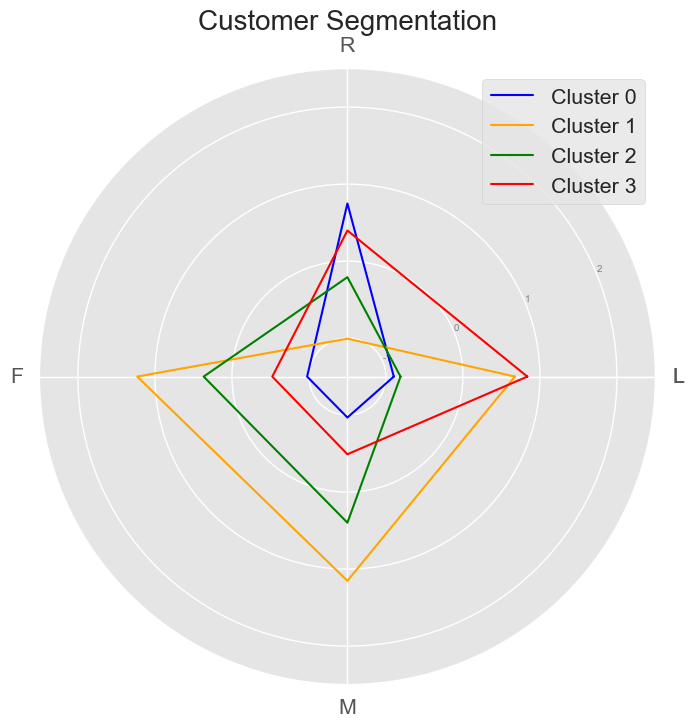

In [63]:
category = ['L', 'R', 'F', 'M']
categories = [*category, category[0]]
color = ['blue', 'orange', 'green', 'red']
clusters = []

for i in range(0,4):
    num = []
    for cat in category:
        num.append(radar_plot[cat][i])
    num.append(radar_plot['L'][i])
    clusters.append(num)

label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(clusters[0]))

plt.figure(figsize=(8, 8))
plt.subplot(polar=True)
for i in range(0,4):
    plt.plot(label_loc, clusters[i], color=color[i], label=f'Cluster {i}')

plt.title('Customer Segmentation', size=20, y=1.05)
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.yticks([-1,0,1,2], ["-1","0","1","2"], color="grey", size=7)
plt.ylim(-1.5,2.5)
plt.legend()
plt.show()

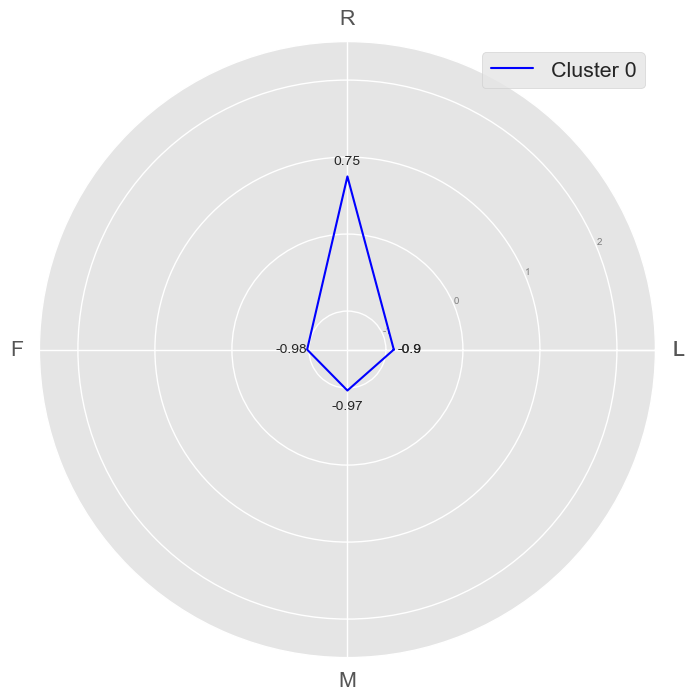

In [64]:
plt.figure(figsize=(8, 8))
ax = plt.subplot(polar=True)

# Menampilkan garis dan label sumbu theta
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)

# Menampilkan label sumbu radial
plt.yticks([-1,0,1,2], ["-1","0","1","2"], color="grey", size=7)

# Menentukan batas sumbu radial
plt.ylim(-1.5,2.5)

# Menampilkan plot data
plt.plot(label_loc, clusters[0], color=color[0], label = 'Cluster 0')

# Menambahkan teks pada setiap titik data
for i, val in enumerate(clusters[0]):
    angle = label_loc[i]
    radius = val
    score = round(val, 2)
    x = angle
    y = radius + 0.2
    plt.text(x, y, score, ha='center', va='center')

# Menampilkan legenda
plt.legend()

# Menampilkan plot
plt.show()


Cluster 0: Customer pada cluster ini memiliki nilai L (Length of customer relationship) dan F (Flight frequency) yang rendah, dan nilai M (Monetary value) yang sangat rendah. Sementara itu, nilai R (Recency) mereka tergolong tinggi. Oleh karena itu, cluster ini dapat diinterpretasikan sebagai cluster dari customer yang belum lama bergabung dengan jasa penerbangan dan belum melakukan banyak penerbangan, serta memiliki nilai belanja yang rendah.

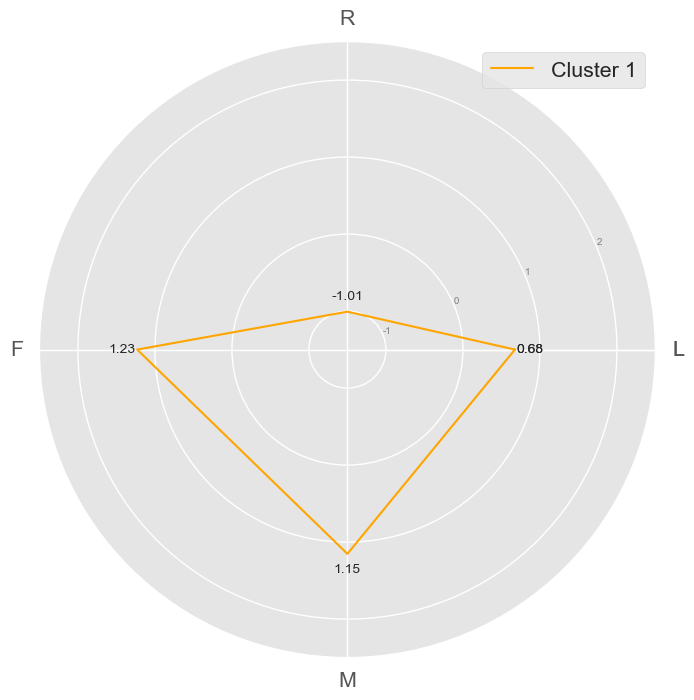

In [65]:
plt.figure(figsize=(8, 8))
ax = plt.subplot(polar=True)

# Menampilkan garis dan label sumbu theta
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)

# Menampilkan label sumbu radial
plt.yticks([-1,0,1,2], ["-1","0","1","2"], color="grey", size=7)

# Menentukan batas sumbu radial
plt.ylim(-1.5,2.5)

# Menampilkan plot data
plt.plot(label_loc, clusters[1], color=color[1], label = 'Cluster 1')

# Menambahkan teks pada setiap titik data
for i, val in enumerate(clusters[1]):
    angle = label_loc[i]
    radius = val
    score = round(val, 2)
    x = angle
    y = radius + 0.2
    plt.text(x, y, score, ha='center', va='center')

# Menampilkan legenda
plt.legend()

# Menampilkan plot
plt.show()


Cluster 1: Customer pada cluster ini memiliki nilai L (Length of customer relationship) yang relatif tinggi, dan nilai R (Recency) yang rendah, artinya mereka adalah customer yang telah lama menjadi pelanggan jasa penerbangan dan melakukan perjalanan baru-baru ini. Selain itu, nilai F (Flight frequency) dan M (Monetary value) mereka juga relatif tinggi, yang menunjukkan bahwa mereka adalah pelanggan yang sering melakukan perjalanan dan memiliki nilai belanja yang tinggi.

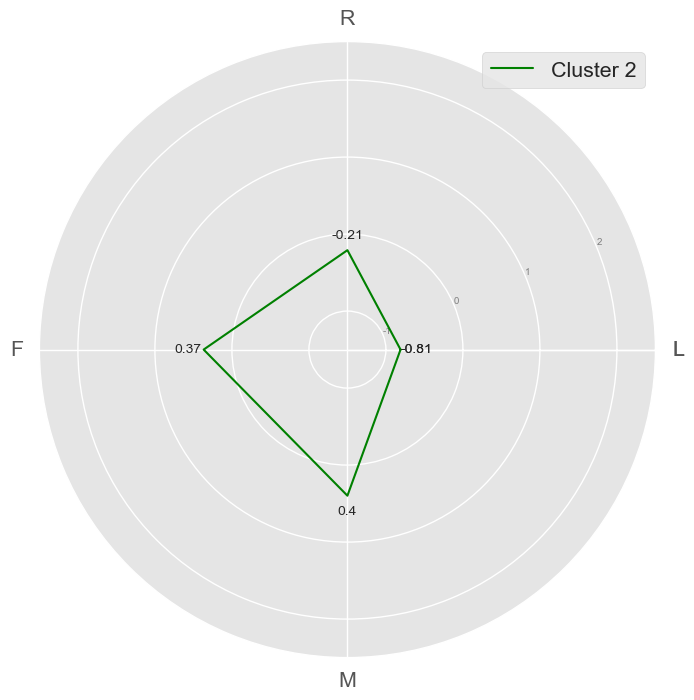

In [66]:
plt.figure(figsize=(8, 8))
ax = plt.subplot(polar=True)

# Menampilkan garis dan label sumbu theta
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)

# Menampilkan label sumbu radial
plt.yticks([-1,0,1,2], ["-1","0","1","2"], color="grey", size=7)

# Menentukan batas sumbu radial
plt.ylim(-1.5,2.5)

# Menampilkan plot data
plt.plot(label_loc, clusters[2], color=color[2], label = 'Cluster 2')

# Menambahkan teks pada setiap titik data
for i, val in enumerate(clusters[2]):
    angle = label_loc[i]
    radius = val
    score = round(val, 2)
    x = angle
    y = radius + 0.2
    plt.text(x, y, score, ha='center', va='center')

# Menampilkan legenda
plt.legend()

# Menampilkan plot
plt.show()


Cluster 2: Customer pada cluster ini memiliki nilai L (Length of customer relationship) dan M (Monetary value) yang sedang, dan nilai R (Recency) yang relatif tinggi. Sementara itu, nilai F (Flight frequency) mereka tergolong rendah. Oleh karena itu, cluster ini dapat diinterpretasikan sebagai cluster dari customer yang sudah lama menjadi pelanggan jasa penerbangan dan memiliki nilai belanja yang sedang, tetapi tidak terlalu sering melakukan perjalanan.

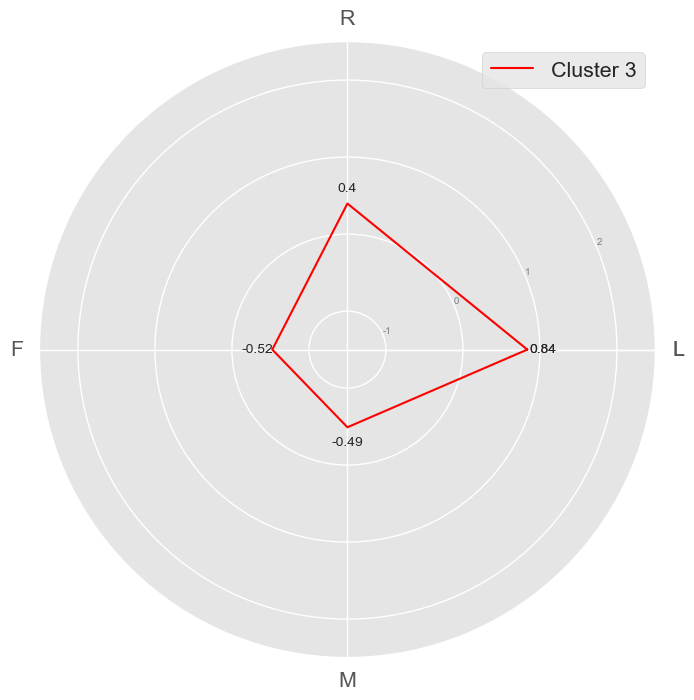

In [67]:
plt.figure(figsize=(8, 8))
ax = plt.subplot(polar=True)

# Menampilkan garis dan label sumbu theta
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)

# Menampilkan label sumbu radial
plt.yticks([-1,0,1,2], ["-1","0","1","2"], color="grey", size=7)

# Menentukan batas sumbu radial
plt.ylim(-1.5,2.5)

# Menampilkan plot data
plt.plot(label_loc, clusters[3], color=color[3], label = 'Cluster 3')

# Menambahkan teks pada setiap titik data
for i, val in enumerate(clusters[3]):
    angle = label_loc[i]
    radius = val
    score = round(val, 2)
    x = angle
    y = radius + 0.2
    plt.text(x, y, score, ha='center', va='center')

# Menampilkan legenda
plt.legend()

# Menampilkan plot
plt.show()


Cluster 3: Customer pada cluster ini memiliki nilai L (Length of customer relationship) yang relatif tinggi, dan nilai R (Recency) yang rendah, artinya mereka adalah customer yang telah lama menjadi pelanggan jasa penerbangan dan melakukan perjalanan baru-baru ini. Namun, nilai F (Flight frequency) dan M (Monetary value) mereka relatif rendah dibandingkan dengan cluster 1. Oleh karena itu, cluster ini dapat diinterpretasikan sebagai cluster dari customer yang lebih jarang melakukan perjalanan, tetapi tetap memiliki nilai belanja yang cukup tinggi.

## Recommendation



*   Cluster 0: Customer pada cluster ini adalah pelanggan baru yang belum melakukan banyak penerbangan dan memiliki nilai belanja yang rendah. Untuk meningkatkan nilai belanja dari pelanggan pada cluster ini, jasa penerbangan dapat memberikan promo atau diskon untuk pembelian tiket pada waktu-waktu tertentu. Selain itu, jasa penerbangan juga dapat memberikan reward atau poin loyalty program kepada pelanggan yang sering melakukan penerbangan.


*   Cluster 1: Customer pada cluster ini adalah pelanggan setia 
yang sering melakukan penerbangan dan memiliki nilai belanja yang tinggi. Untuk menjaga loyalitas dari pelanggan pada cluster ini, jasa penerbangan dapat memberikan reward yang lebih tinggi atau benefit tambahan pada program loyalty program mereka. Selain itu, jasa penerbangan juga dapat memberikan layanan tambahan seperti lounge khusus atau layanan prioritas pada waktu check-in dan boarding.


*   Cluster 2: Customer pada cluster ini adalah pelanggan yang sudah lama menjadi pelanggan jasa penerbangan dan memiliki nilai belanja yang sedang, tetapi tidak terlalu sering melakukan penerbangan. Untuk meningkatkan frekuensi dari penerbangan pada pelanggan pada cluster ini, jasa penerbangan dapat memberikan promo khusus untuk penerbangan-penerbangan tertentu pada waktu-waktu tertentu. Selain itu, jasa penerbangan juga dapat memberikan program diskon atau benefit tambahan pada pelanggan yang sering melakukan penerbangan.


*   Cluster 3: Customer pada cluster ini adalah pelanggan setia yang memiliki nilai belanja yang cukup tinggi, tetapi frekuensi penerbangan mereka relatif rendah dibandingkan dengan pelanggan pada cluster 1. Untuk meningkatkan frekuensi dari penerbangan pada pelanggan pada cluster ini, jasa penerbangan dapat memberikan promo khusus atau diskon untuk penerbangan-penerbangan tertentu pada waktu-waktu tertentu. Selain itu, jasa penerbangan juga dapat memberikan program reward atau poin loyalty program kepada pelanggan yang sering melakukan penerbangan.